In [2]:
from msmarco.download import minimarco
from time import perf_counter
import numpy as np
import pandas as pd
from msmarco.evaluate import grade_results, judge_queries

minmarco_mrr10 = [0] * 5
REBUILD=False
NUM_QUERIES = 1000
NUM_UNRELS = 10

In [3]:
minim, minim_judgments = minimarco(num_queries=NUM_QUERIES, num_unrels=NUM_UNRELS, rebuild=REBUILD)
minim

msmarco_id                                                url  \
0          D312959        https://en.wikipedia.org/wiki/Visual_cortex   
1          D140227  http://www.webmd.com/depression/electroconvuls...   
2          D213890              https://en.wikipedia.org/wiki/Cholera   
3         D1033338  https://answers.yahoo.com/question/index?qid=2...   
4          D508131          http://www.healthline.com/health/beriberi   
...            ...                                                ...   
302324    D2026440  http://faculty.salina.k-state.edu/tim/ossg/Int...   
1172007   D3464906  http://www.worktruckonline.com/channel/mainten...   
703410    D3056747  http://www.spin.com/2015/09/nirvana-krist-novo...   
399264    D2101828  http://growingmarijuanatips.com/how-long-does-...   
2604843    D411577   http://www.city-data.com/city/Monroe-Oregon.html   

                                                     title  \
0                                            Visual cortex   
1                          Electroconvulsive Therapy (ECT)   
2                                                  Cholera   
3        The ABO blood type system in humans is an exam...   
4                                        What is beriberi?   
...                                                    ...   
302324       1.5. Basics of How Operating Systems Work ÃÂ¶   
1172007  Air Brakes or Hydraulic Brakes: That is the Qu...   
703410   Nirvanaâs Krist Novoselic Talks Foo Fightersâ ...   
399264             How Long Does it Take to Grow Marijuana   
2604843                                     Monroe, Oregon   

                                                      body  
0        From Wikipedia, the free encyclopedianavigatio...  
1        Electroconvulsive Therapy (ECT)Treatment Overv...  
2        From Wikipedia, the free encyclopedianavigatio...  
3        Science & Mathematics Biology The ABO blood ty...  
4        What is beriberi? Beriberi is a disease caused...  
...                                                    ...  
302324   1.5. Basics of How Operating Systems Work Â¶1....  
1172007  Air Brakes or Hydraulic Brakes: That is the Qu...  
703410   Archives \Nirvana’s Krist Novoselic Talks Foo ...  
399264   How Long Does it Take to Grow Marijuana In eas...  
2604843  Follow city-data.com founder on our Forum or@L...  

[10979 rows x 4 columns]

In [4]:
minim_judgments

query_id                                              query msmarco_id
0           3     another name for the primary visual cortex is     D312959
1           5               ect is a treatment that is used for     D140227
2          12   rice-water stools are associated with disease...    D213890
3          15               the abo blood types are examples of    D1033338
4          16             the vitamin that prevents beriberi is     D508131
..        ...                                                ...        ...
995      4806                     ketamine infusion side effects    D806650
996      4810                 kirby puckett baseball cards value    D999913
997      4811  klinefelter syndrome is an consequence of what...    D732799
998      4826                                    lasa catagories   D1424340
999      4829                       lgps definition final salary    D853632

[1000 rows x 3 columns]

In [5]:
from searcharray import SearchArray
from msmarco.tokenizers import snowball_tokenizer

minim['title_snowball'] = SearchArray.index(minim['title'], tokenizer=snowball_tokenizer)
minim['body_snowball'] = SearchArray.index(minim['body'], tokenizer=snowball_tokenizer)

minim

msmarco_id                                                url  \
0          D312959        https://en.wikipedia.org/wiki/Visual_cortex   
1          D140227  http://www.webmd.com/depression/electroconvuls...   
2          D213890              https://en.wikipedia.org/wiki/Cholera   
3         D1033338  https://answers.yahoo.com/question/index?qid=2...   
4          D508131          http://www.healthline.com/health/beriberi   
...            ...                                                ...   
302324    D2026440  http://faculty.salina.k-state.edu/tim/ossg/Int...   
1172007   D3464906  http://www.worktruckonline.com/channel/mainten...   
703410    D3056747  http://www.spin.com/2015/09/nirvana-krist-novo...   
399264    D2101828  http://growingmarijuanatips.com/how-long-does-...   
2604843    D411577   http://www.city-data.com/city/Monroe-Oregon.html   

                                                     title  \
0                                            Visual cortex   
1                          Electroconvulsive Therapy (ECT)   
2                                                  Cholera   
3        The ABO blood type system in humans is an exam...   
4                                        What is beriberi?   
...                                                    ...   
302324       1.5. Basics of How Operating Systems Work ÃÂ¶   
1172007  Air Brakes or Hydraulic Brakes: That is the Qu...   
703410   Nirvanaâs Krist Novoselic Talks Foo Fightersâ ...   
399264             How Long Does it Take to Grow Marijuana   
2604843                                     Monroe, Oregon   

                                                      body  \
0        From Wikipedia, the free encyclopedianavigatio...   
1        Electroconvulsive Therapy (ECT)Treatment Overv...   
2        From Wikipedia, the free encyclopedianavigatio...   
3        Science & Mathematics Biology The ABO blood ty...   
4        What is beriberi? Beriberi is a disease caused...   
...                                                    ...   
302324   1.5. Basics of How Operating Systems Work Â¶1....   
1172007  Air Brakes or Hydraulic Brakes: That is the Qu...   
703410   Archives \Nirvana’s Krist Novoselic Talks Foo ...   
399264   How Long Does it Take to Grow Marijuana In eas...   
2604843  Follow city-data.com founder on our Forum or@L...   

                                            title_snowball  \
0                              Terms({'visual', 'cortex'})   
1              Terms({'ect', 'therapi', 'electroconvuls'})   
2                                       Terms({'cholera'})   
3        Terms({'of', 'blood', 'human', 'type', 'exampl...   
4                        Terms({'beriberi', 'what', 'is'})   
...                                                    ...   
302324   Terms({'15', 'of', 'how', 'basic', 'ãâ¶', 'ope...   
1172007  Terms({'that', 'air', 'hydraul', 'or', 'questi...   
703410   Terms({'foo', 'fightersâ', 'krist', 'nirvanaâ'...   
399264   Terms({'marijuana', 'how', 'long', 'doe', 'tak...   
2604843                         Terms({'oregon', 'monro'})   

                                             body_snowball  
0        Terms({'stage', 'livingston', 'environ', 'anal...  
1        Terms({'primari', 'nausea', 'and', 'adult', 't...  
2        Terms({'20090827', 'stage', 'symptoms2', 'inab...  
3        Terms({'and', 'to', 'newest', 'abo', 'but', 'a...  
4        Terms({'asparagus', 'stage', 'and', 'beet', 'r...  
...                                                    ...  
302324   Terms({'block', 'request', 'supervisor', 'and'...  
1172007  Terms({'and', 'line', 'insur', 'costbenefit', ...  
703410   Terms({'way', 'report', 'today', 'and', 'sat',...  
399264   Terms({'way', 'stage', 'strategi', 'big', 'and...  
2604843  Terms({'8transport', 'environ', '14benton', 's...  

[10979 rows x 6 columns]

In [6]:
def or_query_search(corpus, fields, query, query_id=None, n=10):
    if not isinstance(fields, list):
        fields = [fields]
    start = perf_counter()
    scored = np.zeros(len(corpus))
    for field in fields:
        boost = 1.0
        if '^' in field:
            field, boost = field.split('^')
            boost = float(boost)
        tokenizer = corpus[field].array.tokenizer
        tokens = tokenizer(query)
        scored += (np.sum([corpus[field].array.score(token) for token in tokens], axis=0) * boost)
    took = perf_counter() - start
    
    top_n_idx = np.argsort(scored)[::-1][:n]
    scores = scored[top_n_idx]
    top_n_idx, scores

    top_n = corpus[['title', 'msmarco_id']].iloc[top_n_idx]
    top_n['scores'] = scores
    top_n['query'] = query
    top_n['query_id'] = query_id
    top_n['took'] = took
    top_n['rank'] = np.arange(n) + 1
    return top_n

or_query_search(corpus=minim, fields="title_snowball", query="cheese inside")

title msmarco_id    scores  \
2860715                      Join Law Insider   D3255947  3.950340   
11795                       History of Cheese   D2499064  3.655829   
3104372              Cloverhill Cheese Danish   D2356374  3.655829   
2747145           Calories in Manchego Cheese   D1546812  3.340552   
446609                 Potato and Cheese Soup   D2694173  3.340552   
1482028        SAUSAGE, EGG & CHEESE SANDWICH    D886045  3.340552   
2362278            Classic Plain Cream Cheese    D938562  3.340552   
1756013                Inside the war on coal   D2979027  3.323083   
234765     Bill Gates House & Inside Pictures   D2014807  3.323083   
1213122  Huge 'Ocean' Discovered Inside Earth   D3362276  3.323083   

                 query query_id      took  rank  
2860715  cheese inside     None  0.000947     1  
11795    cheese inside     None  0.000947     2  
3104372  cheese inside     None  0.000947     3  
2747145  cheese inside     None  0.000947     4  
446609   cheese inside     None  0.000947     5  
1482028  cheese inside     None  0.000947     6  
2362278  cheese inside     None  0.000947     7  
1756013  cheese inside     None  0.000947     8  
234765   cheese inside     None  0.000947     9  
1213122  cheese inside     None  0.000947    10

## Title search

Just search title w/ BM25

In [7]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='title_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

title msmarco_id  \
0                                            Visual cortex    D312959   
2650240                What is another word for education?    D892523   
100595                               Another word for time   D3094958   
1751759            What is another word for set in motion?   D2459021   
2495797  What is the origin of the name for planet merc...   D2520132   
...                                                    ...        ...   
853680                           Final Stages of Pregnancy   D2499268   
1394757                       Medical Interpreter Salaries   D3431606   
1214435                             Human Service Salaries     D88767   
2839686                                NFL Salary Rankings   D1417657   
2785011                               Case Worker Salaries   D2166032   

           scores                                            query  query_id  \
0        9.712521   another name for the primary visual cortex is          3   
2650240  5.417593   another name for the primary visual cortex is          3   
100595   5.030671   another name for the primary visual cortex is          3   
1751759  4.722834   another name for the primary visual cortex is          3   
2495797  4.529799   another name for the primary visual cortex is          3   
...           ...                                              ...       ...   
853680   3.306948                     lgps definition final salary      4829   
1394757  3.013242                     lgps definition final salary      4829   
1214435  3.013242                     lgps definition final salary      4829   
2839686  3.013242                     lgps definition final salary      4829   
2785011  3.013242                     lgps definition final salary      4829   

             took  rank  
0        0.002747     1  
2650240  0.002747     2  
100595   0.002747     3  
1751759  0.002747     4  
2495797  0.002747     5  
...           ...   ...  
853680   0.000561     6  
1394757  0.000561     7  
1214435  0.000561     8  
2839686  0.000561     9  
2785011  0.000561    10  

[10000 rows x 7 columns]

In [8]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[0] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[0]

0.5519039682539683

## Body search

In [9]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='body_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

title msmarco_id     scores  \
0                                         Visual cortex    D312959  11.655572   
2980343                                               .   D1817213   8.947761   
610725         Popular Study Materials from Biology 225   D1629589   8.316230   
672800                                         Cerebrum     D15306   8.122213   
927                Brain Structures and their Functions     D10666   7.520179   
...                                                 ...        ...        ...   
1214435                          Human Service Salaries     D88767   4.267721   
3155619             Profit Function: Equation & Formula    D798885   4.098536   
205842                      Veterinary Assistant Salary     D10112   4.077713   
78124    How 401 (k) Contributions Affect Your Paycheck   D2745286   4.043986   
2483853                                             gap    D475027   4.009703   

                                                   query  query_id      took  \
0         another name for the primary visual cortex is          3  0.014597   
2980343   another name for the primary visual cortex is          3  0.014597   
610725    another name for the primary visual cortex is          3  0.014597   
672800    another name for the primary visual cortex is          3  0.014597   
927       another name for the primary visual cortex is          3  0.014597   
...                                                  ...       ...       ...   
1214435                     lgps definition final salary      4829  0.000695   
3155619                     lgps definition final salary      4829  0.000695   
205842                      lgps definition final salary      4829  0.000695   
78124                       lgps definition final salary      4829  0.000695   
2483853                     lgps definition final salary      4829  0.000695   

         rank  
0           1  
2980343     2  
610725      3  
672800      4  
927         5  
...       ...  
1214435     6  
3155619     7  
205842      8  
78124       9  
2483853    10  

[10000 rows x 7 columns]

In [10]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[1] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[1]

0.7855555555555556

## Body plus title

Body and title together

In [11]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

title msmarco_id     scores  \
0                                   Visual cortex    D312959  21.368093   
271616                               Visual novel   D2751955   9.274527   
2980343                                         .   D1817213   8.947761   
957                          Visual communication    D999777   8.808942   
610725   Popular Study Materials from Biology 225   D1629589   8.316230   
...                                           ...        ...        ...   
825                    Nursing Salary Information     D11799   6.335701   
2561553                          Zoologist Salary   D2985969   6.244540   
2785011                      Case Worker Salaries   D2166032   6.221697   
1095067                Network Specialist  Salary   D1667134   6.184263   
1394757              Medical Interpreter Salaries   D3431606   6.150544   

                                                   query  query_id      took  \
0         another name for the primary visual cortex is          3  0.015185   
271616    another name for the primary visual cortex is          3  0.015185   
2980343   another name for the primary visual cortex is          3  0.015185   
957       another name for the primary visual cortex is          3  0.015185   
610725    another name for the primary visual cortex is          3  0.015185   
...                                                  ...       ...       ...   
825                         lgps definition final salary      4829  0.000644   
2561553                     lgps definition final salary      4829  0.000644   
2785011                     lgps definition final salary      4829  0.000644   
1095067                     lgps definition final salary      4829  0.000644   
1394757                     lgps definition final salary      4829  0.000644   

         rank  
0           1  
271616      2  
2980343     3  
957         4  
610725      5  
...       ...  
825         6  
2561553     7  
2785011     8  
1095067     9  
1394757    10  

[10000 rows x 7 columns]

In [12]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[2] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[2]

0.777575

## Weigh body * 10

In [13]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball^10', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[3] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[3]

0.8145761904761905

## Weigh title * 10

In [14]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball^10'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[4] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[4]

0.5975996031746031

## Compare MSMarco -> MiniMarco Sample

In [39]:
labels = np.asarray(['title', 'body', 'title body', 'title^10 body', 'body^10 title'])
msmarco_mrr10 = np.asarray([0.1914920634920635, 0.22227182539682536, 0.26367896825396825, 0.2569694444444444, 0.20999087301587302])
# [0.1879472222222222,
#  0.21533611111111112,
#  0.2658829365079365,
#  0.24670238095238095,
#  0.21640238095238096]
minimarco_mrr10 = np.asarray(minmarco_mrr10)

In [36]:
msmarco_sorted_idx = msmarco_mrr100.argsort()
labels[msmarco_sorted_idx]

array(['title', 'body^10 title', 'body', 'title^10 body', 'title body'],
      dtype='<U13')

In [33]:
msmarco_mrr100_sorted = msmarco_mrr100[msmarco_sorted_idx]
minimarco_mrr10_sorted = minimarco_mrr10[msmarco_sorted_idx]

In [34]:
from scipy.stats import spearmanr

spearmanr(msmarco_mrr100_sorted, minimarco_mrr10_sorted)

SignificanceResult(statistic=0.7, pvalue=0.18812040437418728)

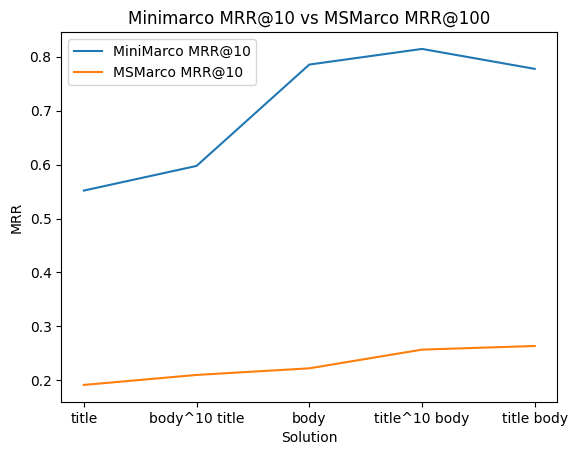

In [38]:
import matplotlib.pyplot as plt


x = np.arange(len(minimarco_mrr10_sorted))
plt.plot(x, minimarco_mrr10_sorted, label='MiniMarco MRR@10')
plt.plot(x, msmarco_mrr100_sorted, label='MSMarco MRR@10')

plt.title('Minimarco MRR@10 vs MSMarco MRR@100')
plt.xlabel('Solution')
plt.ylabel('MRR')
plt.xticks(x, labels[msmarco_sorted_idx])
plt.legend()
